## Inicio - Dataset Car Prices

Este dataset contiene información de ventas de autos de todo tipo y marcas variadas desde los mas caros del mercado hasta los más accesibles, cuenta con información sobre la venta, modelo, color, estado, etc.

sellingprice es la variable objetivo a predecir. Significa: Precio de venta

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Establecemos algunas configuraciones de estilo y de muestra de datos al utilizar Pandas y Seaborn

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", None)
sns.set_style('darkgrid')

## Lectura del dataset

In [3]:
df = pd.read_csv("full_car_prices.csv")
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


## Descripcion de cada columna y tipo de dato que contiene

- year: Año del modelo del auto (int64) [1982 al 2015]
- make: Marca del auto (object) Ejemplos: ['Aston Martin', 'Audi', 'BMW', 'Cadillac', 'Chevrolet', 'Dodge', 'FIAT','Ferrari','Ford', 'Honda']
- model: Modelo del auto (object) Ejemplos: ['tucson', 'tt', 'thunderbird','taurus', 'tahoe', 'tC', 'sx4', 'swift', 'subrbn','sprinter', 'sportage', 'sonoma']
- trim: Versión del auto (object) Ejemplos: ['Wagon XLT','Wagon Titanium LWB', 'Wagon', 'WS', 'WRX TR', 'WRX STi','WRX STI Limited', 'WRX STI', 'WRX Limited']
- body: Tipo de carrocería (object) Ejemplos: ['wagon', 'van', 'tsx sport wagon', 'transit van', 'suv','supercrew', 'supercab', 'sedan','quad cab', 'q60 coupe']
- transmission: Tipo de transmisión (object) Ejemplos: ['manual', 'automatic']
- vin: Número de identificación del vehículo (object)
- state: Estado (object) Ejemplos: ['ny', 'nv', 'ns', 'nm', 'nj', 'ne', 'nc', 'ms', 'ma', 'la', 'in', 'il', 'hi', 'ga', 'fl','co', 'ca']
- condition: Condición del auto (float64) [1 al 50]
- odometer: Kilometraje del auto (float64)
- color: Color exterior (object) Ejemplos: ['yellow', 'white', 'turquoise', 'silver', 'red', 'lime', 'green', 'gray', 'gold','charcoal','blue', 'black']
- interior: Color interior (object) Ejemplos: ['yellow', 'white', 'tan', 'silver', 'red', 'purple', 'orange','burgundy','black', 'beige']
- seller: Vendedor (object) Ejemplos: ['zygi auto corp', 'zumbrota ford sales llc', 'zuma autoboat','101motors', '1 for all auto sales', '1 cochran of monroeville']
- mmr: Precio promedio de mercado (float64) Ejemplo: 21500.0
- sellingprice: Precio de venta (float64) Ejemplo: 21500.0
- saledate: Fecha de venta (object) Ejemplo: [Wed May 27 2015 17:00:00 GMT-0700 (PDT)]

## Estadística descriptiva

In [245]:
df.shape

(558837, 19)

El dataset elegido cuenta con 558837 filas y 16 columnas, de las cuales 10 (diez) son variables independientes a analizar y el target es sellingprice

In [11]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


A pesar de ver varias columnas con algunos valores vacios el DataFrame esta bastante completo

## Columnas categóricas

In [12]:
df.describe(include = 'object').T

,count,unique,top,freq
make,548536,96,Ford,93554
model,548438,973,Altima,19349
trim,548186,1963,Base,55817
body,545642,87,Sedan,199437
transmission,493485,4,automatic,475915
vin,558833,550297,automatic,22
state,558837,64,fl,82945
color,558088,46,black,110970
interior,558088,17,black,244329
seller,558837,14263,nissan-infiniti lt,19693


Aqui notamos algunas inconsistencias en los datos:

- Columna [vin]: (Número de identificación del vehículo) encontramos valores automatic que debemos limpiar antes de trabajar el dataframe
- Columna [transmission]: con varios valores nulos, podemos ver si la marca y modelo del auto se repite y tiene datos en la columna transmision, en caso de ser asi podemos completar los datos faltantes en nuestro dataframe.

## Columnas numéricas

In [246]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,558837.0,2010.038927,3.966864,1982.0,2007.0,2012.0,2013.0,2015.0
condition,547017.0,30.672365,13.402832,1.0,23.0,35.0,42.0,49.0
odometer,558743.0,68320.017767,53398.542821,1.0,28371.0,52254.0,99109.0,999999.0
mmr,558799.0,13769.377495,9679.967174,25.0,7100.0,12250.0,18300.0,182000.0
sellingprice,558825.0,13611.358810,9749.501628,1.0,6900.0,12100.0,18200.0,230000.0


In [247]:
numericas_null = pd.DataFrame({'Cantidad' : df.isnull().sum(), 'Porcentaje' : (df.isnull().sum()) / (len(df)) * (100)})
numericas_null = numericas_null[numericas_null['Cantidad'] != 0]
numericas_null['Cantidad']

make            10301
model           10399
trim            10651
body            13195
transmission     1819
vin                 4
condition       11820
odometer           94
color             749
interior          749
mmr                38
sellingprice       12
saledate           12
Estado          11820
Name: Cantidad, dtype: int64

En las columnas numericas sobresale la columna [condition] que refiere a la condicion del auto, esta variable es categorica mas que numerica, debemos analizar bien estos datos y agrupar segun el estado real del coche.
Ademas tiene varios valores vacios al igual que transmission como vimos arriba...

## Cardinalidad

Una nueva verificacion de los datos para corroborar que los valores identificatorios como el [vin] sea correcto.

In [25]:
cardinalidad = pd.DataFrame({'Cantidad' : df.nunique(), 'Porcentaje' : (df.nunique()) / (df.shape[0]) * (100), 'Filas totales': df.shape[0]})
cardinalidad

,Cantidad,Porcentaje,Filas totales
year,34,0.006084,558837
make,96,0.017179,558837
model,973,0.174112,558837
trim,1963,0.351265,558837
body,87,0.015568,558837
transmission,4,0.000716,558837
vin,550297,98.471826,558837
state,64,0.011452,558837
condition,41,0.007337,558837
odometer,172278,30.827952,558837


Analisis de lo visto en los barchart:

1) year: La mayoría de los autos en el conjunto de datos son de años recientes.
2) odometer: El kilometraje muestra una distribución sesgada a la derecha, indicando que hay muchos más autos con bajos kilometrajes.
3) mmr: El precio promedio de mercado también está sesgado a la derecha, con la mayoría de los autos teniendo un MMR bajo.
4) sellingprice: La distribución del precio de venta es similar a la del MMR, con la mayoría de los autos vendiéndose a precios más bajos.

## Limpieza y correccion de datos

Lista de variables a revisar:

##### Columna   |   Cantidad:
- make       |     10301
- model      |     10399
- trim       |     10651
- body       |     13195
- transmission  |  65352
- vin        |         4
- condition  |     11820
- odometer   |        94
- color      |       749
- interior   |       749
- mmr        |        38
- sellingprice   |    12
- saledate       |    12


Las mas alarmantes son make, model, trim, transmission y condition, entiendo que a medida que se encuentre una solucion para esos datos se corregiran los demas.

In [10]:
# Guardamos en transmision_null los valores donde la transmiscion sea nula/vacia
transmision_null = df[df['transmission'].isna()]
# En la variable modelos guardamos los modelos que no cuentan con esta informacion.
modelos = transmision_null['model'].unique()
# Mientras que en transmision_si contaremos con la transmision de los modelos guardados anteriormente.
transmision_si = df[(df['transmission'].notna()) & (df['model'].isin(modelos))]

# Creamos un diccionario con el modelo y su transmisión más común con el metodo .mode()
trans_mappings = transmision_si.groupby('model')['transmission'].agg(lambda x: x.mode()[0]).to_dict()

# Rellenamos los valores nulos de la columna transmission con los valores del diccionario trans_mappings
df['transmission'] = df.apply(lambda row: trans_mappings[row['model']] if pd.isna(row['transmission']) and row['model'] in trans_mappings else row['transmission'], axis=1)

### Autos vendidos por mayor precio

In [8]:
order_sellingprice = df.sort_values(by='sellingprice', ascending=False)
df_top_sellingprice = order_sellingprice[['make', 'sellingprice']].head(149)
df_top_sellingprice.sort_values(by='sellingprice', ascending=False)

,make,sellingprice
344905,Ford,230000.0
548169,Ferrari,183000.0
446949,Mercedes-Benz,173000.0
545523,Rolls-Royce,171500.0
125095,Rolls-Royce,169500.0
...,...,...
398767,Land Rover,104000.0
148296,Mercedes-Benz,104000.0
507604,Audi,104000.0
242835,Audi,104000.0


Es inesperado que un modelo de auto Ford se encuentre en el top 1 de autos con mayor precio de venta, por lo que investigando un poco mas identifico la venta de dos autos Ford Escape con un sellingprice de 230000 y otro de 108200, esto probablemente haya sido un error ya que viendo otras ventas de los mismos modelos los precios varian entre los 20000 y 35000.

In [98]:
ford_escape = df[(df['make'] == 'Ford') & (df['model'] == 'Escape') & ((df.trim == 'XLT') | (df.trim == 'Titanium'))]
ford_escape = ford_escape.sort_values(by='sellingprice', ascending=False).head(10)
ford_escape

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
344905,2014,Ford,Escape,Titanium,SUV,automatic,1fmcu9j98eua23833,mo,43.0,27802.0,green,tan,ford-lincoln dealer program,22800.0,230000.0,Wed Feb 25 2015 02:00:00 GMT-0800 (PST)
160201,2010,Ford,Escape,XLT,SUV,automatic,1fmcu0d77aka54695,oh,37.0,82985.0,red,gray,pat obrien chevrolet south,8250.0,108200.0,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
405998,2014,Ford,Escape,Titanium,SUV,automatic,1fmcu9j95euc69710,co,19.0,33548.0,gray,beige,automotive solutions inc,22900.0,32800.0,Tue Mar 31 2015 05:00:00 GMT-0700 (PDT)
406864,2014,Ford,Escape,Titanium,SUV,automatic,1fmcu9j95eub34288,mo,45.0,34597.0,white,tan,ars/avis budget group,22700.0,32500.0,Wed Apr 15 2015 03:00:00 GMT-0700 (PDT)
407201,2014,Ford,Escape,Titanium,SUV,automatic,1fmcu9j94euc54096,tx,47.0,34220.0,—,black,avis budget group,29000.0,30800.0,Wed May 27 2015 03:15:00 GMT-0700 (PDT)
542847,2014,Ford,Escape,Titanium,suv,NaN,1fmcu9j97eud81943,on,5.0,16551.0,white,black,ford motor company of canada,25500.0,27300.0,Tue Jun 16 2015 03:00:00 GMT-0700 (PDT)
542850,2014,Ford,Escape,Titanium,suv,NaN,1fmcu9j9xeud46328,on,47.0,17076.0,white,black,ford motor company of canada,25500.0,27200.0,Tue Jun 16 2015 03:00:00 GMT-0700 (PDT)
511591,2014,Ford,Escape,Titanium,suv,NaN,1fmcu9j93euc86800,on,44.0,14598.0,white,black,ford motor company of canada limited,25700.0,27000.0,Tue Jun 09 2015 03:00:00 GMT-0700 (PDT)
417541,2014,Ford,Escape,Titanium,SUV,automatic,1fmcu9j95eud26374,il,46.0,33114.0,gray,gray,avis budget group,21800.0,27000.0,Tue May 19 2015 04:00:00 GMT-0700 (PDT)
411717,2014,Ford,Escape,Titanium,SUV,automatic,1fmcu9j98euc54151,il,37.0,33235.0,silver,gray,avis budget group,26900.0,26900.0,Thu May 21 2015 03:00:00 GMT-0700 (PDT)


Arriba podemos ver que es un claro error de datos, por lo que no se tendra en cuenta para el analisis, los borrare y procedere a graficar.

## Visualizaciones

In [100]:
df_top_sellingprice = df_top_sellingprice[~((df_top_sellingprice['make'] == 'Ford') 
                                           & ((df_top_sellingprice['sellingprice'] == 230000) 
                                           | (df_top_sellingprice['sellingprice'] == 108200)))]
df_top_sellingprice.sort_values(by='sellingprice', ascending=False).head(5)

,make,sellingprice
548169,Ferrari,183000.0
446949,Mercedes-Benz,173000.0
545523,Rolls-Royce,171500.0
125095,Rolls-Royce,169500.0
557570,Rolls-Royce,169000.0


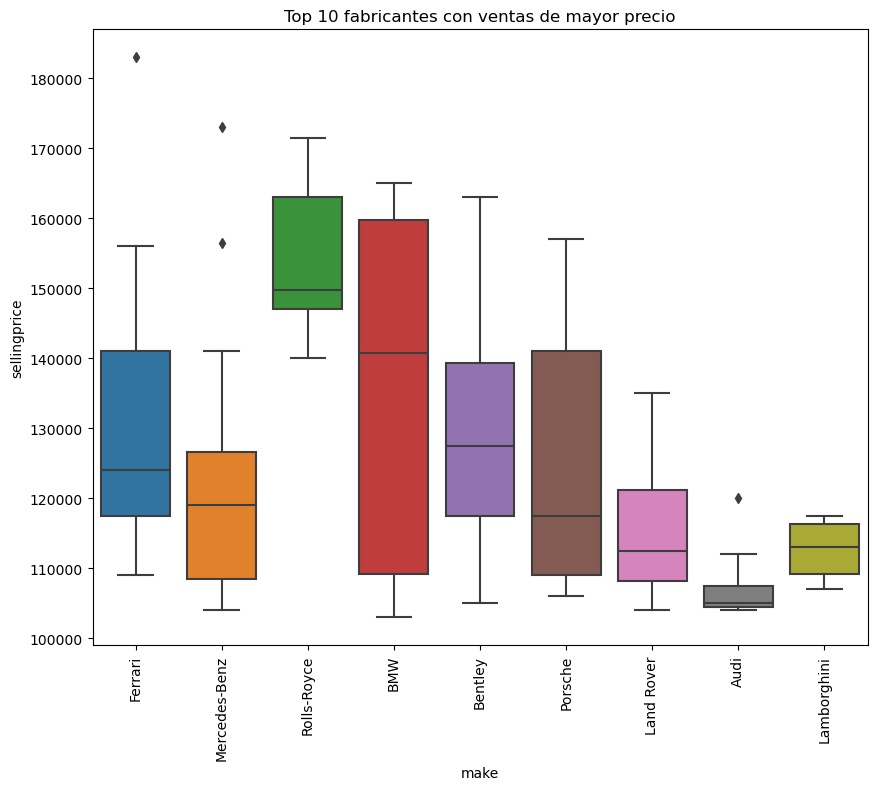

In [101]:
# Boxplot del top 10 precio de venta por marca
plt.figure(figsize=(10, 8))
sns.boxplot(x='make', y='sellingprice', data=df_top_sellingprice)
plt.xticks(rotation=90)
plt.title('Top 10 fabricantes con ventas de mayor precio')
plt.show()

Visualizamos las variables categoricas para entenderlas mejor y adentrarnos en nuestra informacion.

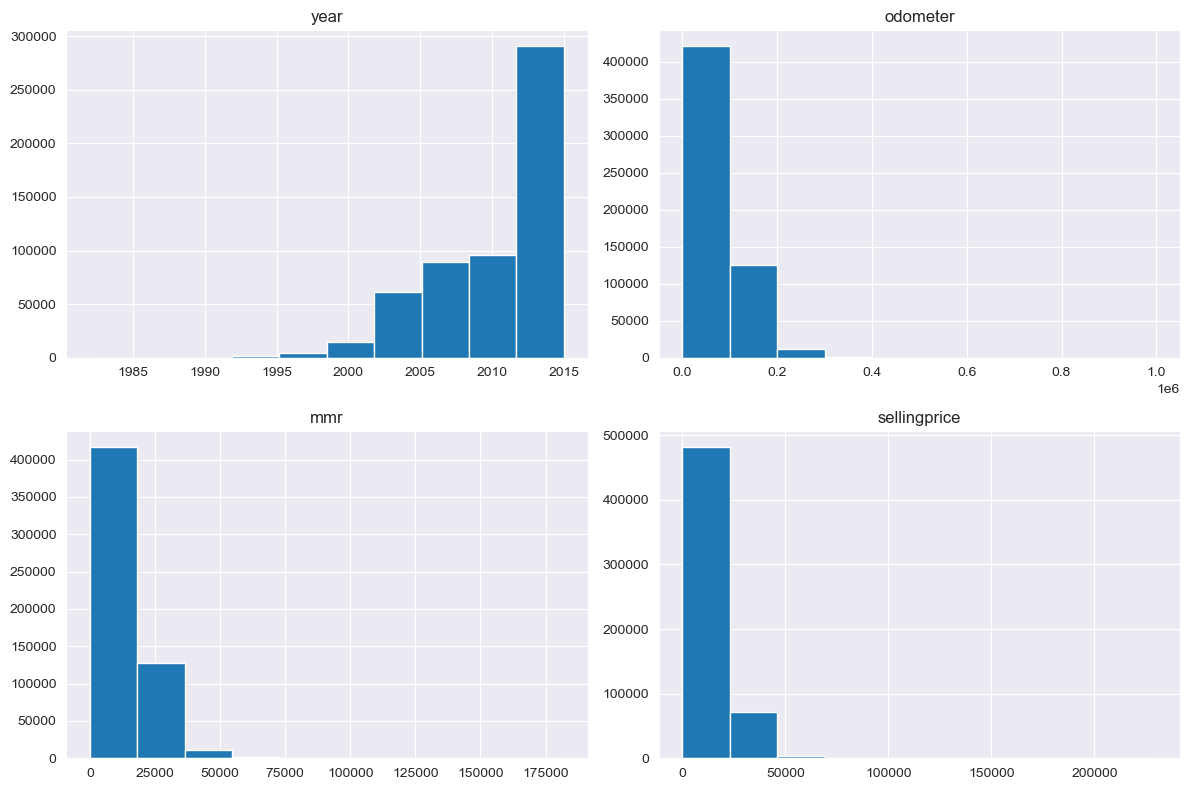

In [11]:
# Distribuciones de las variables numéricas
df[['year', 'odometer', 'mmr', 'sellingprice']].hist(figsize=(12, 8), layout=(2, 2))

# Mostrar graficos
plt.tight_layout()
plt.show()

In [24]:
# Filtrando los 10 modelos mas vendidos
top_models = df['model'].value_counts().nlargest(10).index
top_model_data = df[df['model'].isin(top_models)]
top_model_data[['make', 'model','sellingprice']].sort_values(by='model', ascending=False).sample(n=5)

,make,model,sellingprice
495603,BMW,3 Series,20400.0
323088,Ford,F-150,15800.0
315298,Toyota,Camry,14500.0
243131,Honda,Accord,7400.0
538908,Ford,Fusion,3900.0


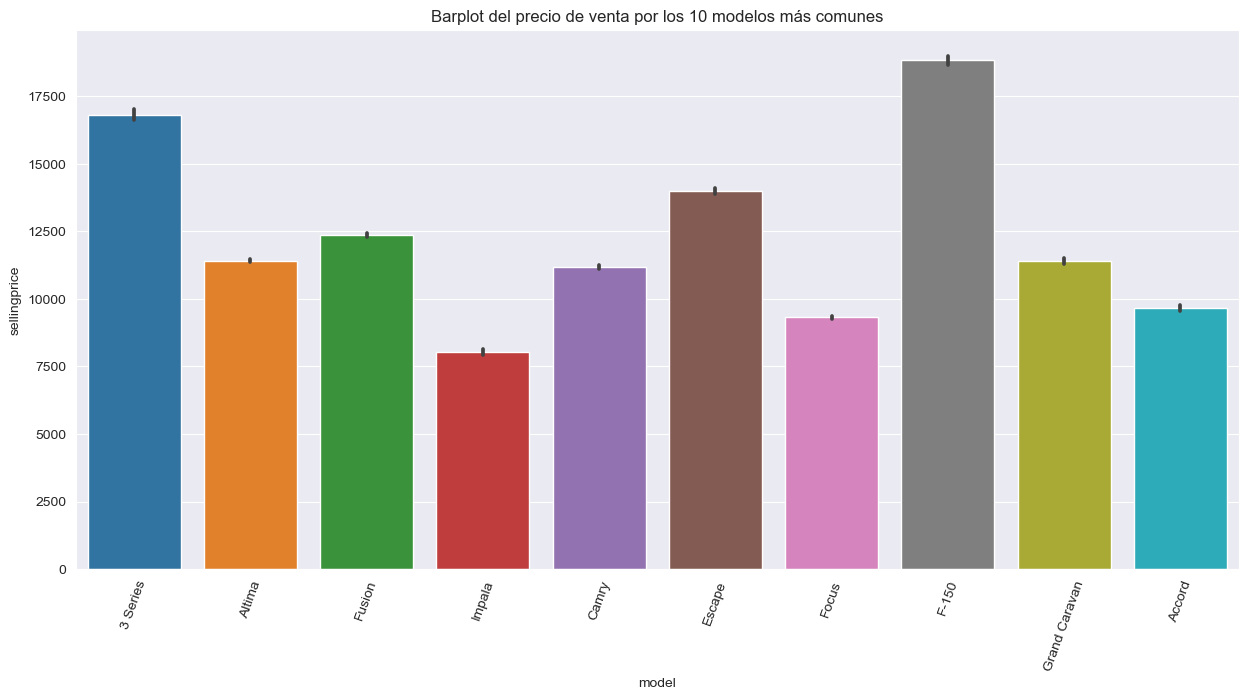

In [48]:
# Boxplot del precio de venta por modelo (mostrando solo los 10 modelos más comunes)
plt.figure(figsize=(15, 7))
sns.barplot(x='model', y='sellingprice', data=top_model_data)
plt.xticks(rotation=70)
plt.title('Barplot del precio de venta por los 10 modelos más comunes')
plt.show()

El outlier del modelo Escape de la marca Ford es el que trabajamos anteriormente con el dataframe de autos de alta gama.

In [42]:
# Top 5 de los autos mas vendidos
frec = df[['make','model']].value_counts()
frec_df = pd.DataFrame(frec)
frec_df.head()

count
make   model        
Nissan Altima  19349
Ford   F-150   14479
       Fusion  12946
Toyota Camry   12545
Ford   Escape  11861

### Condición de los autos

Mas alla de que la columna condición sea numerica, es una variable categórica y procedemos a realizar una agrupación por estado del coche y crear una nueva columna (Estado) para no pisar esos datos

In [146]:
df['Estado'] = pd.cut(df['condition'], bins=[0, 10, 45, 50], labels=["Mal Estado", "Buen Estado", "Excelente Estado"])

Muestreo de los datos actualizados:

In [148]:
#Muestra de la nueva columna comparada con la columna anterior
df['Estado'] = pd.Categorical(df['Estado'])
df[['condition','Estado']].sample(n=5)

,condition,Estado
310870,19.0,Buen Estado
275600,2.0,Mal Estado
507368,28.0,Buen Estado
240559,49.0,Excelente Estado
88452,36.0,Buen Estado


In [156]:
muestreo_excelente = df[df['Estado'] == 'Excelente Estado']
muestreo_excelente[['make', 'model', 'year', 'odometer', 'condition', 'mmr', 'sellingprice']].sample(n=5)

,make,model,year,odometer,condition,mmr,sellingprice,Gama
209931,Hyundai,Sonata Hybrid,2012,27983.0,48.0,14100.0,14600.0,Gama Media
236730,Scion,iQ,2014,5093.0,47.0,10400.0,11700.0,Gama Media
96029,Toyota,Tacoma,2014,3984.0,49.0,30000.0,29100.0,Gama Alta
228841,Ford,F-250 Super Duty,2008,60880.0,47.0,27400.0,30800.0,Gama Media
387768,BMW,5 Series,2010,69619.0,48.0,17750.0,17700.0,Gama Media


Para asegurarnos de que estemos categorizando bien segun el valor de la condicion del auto vemos una pequeña muestra de algunos valores.

c:\Users\Maxi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


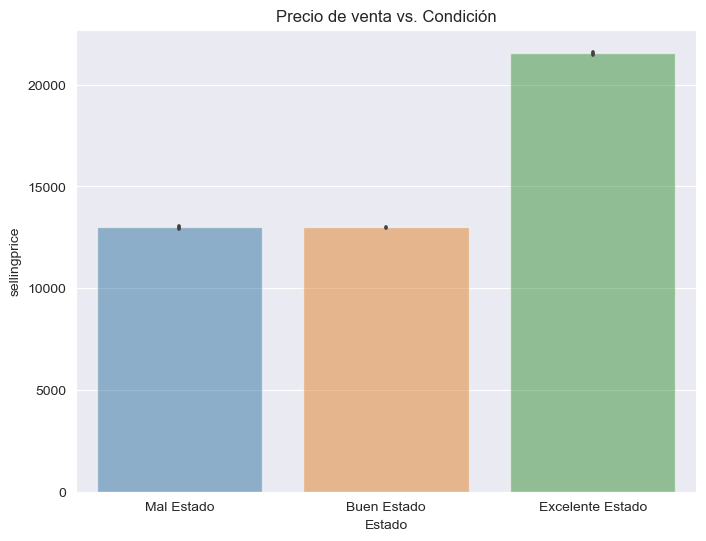

In [150]:
# Relación entre el precio de venta y la condición
plt.figure(figsize=(8, 6))
sns.barplot(x='Estado', y='sellingprice', data=df, alpha=0.5)
plt.title('Precio de venta vs. Condición')
plt.show()

### Gama del auto

Ademas de transformar la variable condición de númerica a categorica ahora categorizamos en [Gama Baja, Gama Media y Gama Alta] a los autos a través de una función para comprobar las siguientes hipótesis:

1) ¿Es mayor el porcentaje de autos con transmisión manual que el de autos con transmisión automática dentro de la categoría de autos Gama Baja?
2) Gama Media, ¿La condición/kilometraje del auto es un factor determinante para indicar el precio de un auto estándar?
3) ¿Un auto de Gama Alta fabricado antes del 2010 se desvaloriza en el mercado con el paso del tiempo? ¿Infiere en esto la condición y/o el kilometraje del auto?

In [251]:
# Función para categorizar autos según su gama contemplando varios parámetros.
def categorizar_auto(row):
    puntaje = 0
    
    if row['condition'] > 40:
        puntaje += 2 
    elif row['condition'] > 20:
        puntaje += 1

    if row['odometer'] < 10000:
        puntaje += 2
    elif row['odometer'] < 50000:
        puntaje += 1
    
    if row['transmission'] == 'automatic':
        puntaje += 1

    umbral_mmr_medio = 11250
    umbral_mmr_alto = 18300
    if row['mmr'] > umbral_mmr_alto:
        puntaje += 2
    elif row['mmr'] > umbral_mmr_medio:
        puntaje += 1

    if puntaje >= 6:
        return 'Gama Alta'
    elif puntaje >= 3:
        return 'Gama Media'
    else:
        return 'Gama Baja'

df['Gama'] = df.apply(categorizar_auto, axis=1)

In [252]:
# Hipótesis 1:
baja_trsm = df[(df.Gama == 'Gama Baja') & ((df.transmission == 'automatic') | (df.transmission == 'manual'))][['Gama', 'transmission']]

df_baja_transmission = pd.DataFrame({'Cantidad': baja_trsm.value_counts()}).reset_index()
df_baja_transmission

,Gama,transmission,Cantidad
0,Gama Baja,automatic,196791
1,Gama Baja,manual,11282


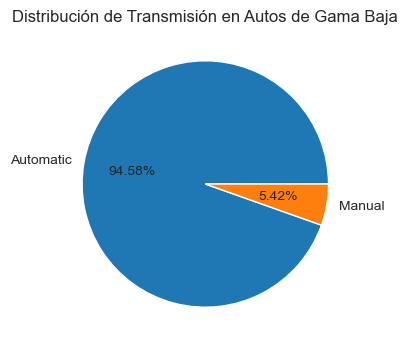

In [271]:
plt.figure(figsize=(8, 4))

plt.pie(df_baja_transmission['Cantidad'], labels=['Automatic', 'Manual'], autopct='%1.2f%%')
plt.title('Distribución de Transmisión en Autos de Gama Baja')
plt.show()


Nuestra primer hipotesis fue destruida con la información que observamos, destacando que aunque sea un auto de gama baja pondera la transmisón automática.

In [254]:
# Hipótesis 2:
media_condition_odometer = df[df.Gama == 'Gama Media'][['Gama', 'odometer', 'Estado', 'sellingprice']].reset_index(drop=True)
estado_mapping = {'Mal Estado': 0, 'Buen Estado': 1, 'Excelente Estado': 2}
media_condition_odometer['Estado'] = media_condition_odometer['Estado'].map(estado_mapping)
media_condition_odometer.dropna(subset=['odometer', 'Estado', 'sellingprice'], inplace=True)

In [255]:
correlation = media_condition_odometer[['Estado', 'odometer', 'sellingprice']].corr()
correlation

,Estado,odometer,sellingprice
Estado,1.000000,0.171693,-0.172420
odometer,0.171693,1.000000,-0.147183
sellingprice,-0.172420,-0.147183,1.000000


## Mapa de Calor

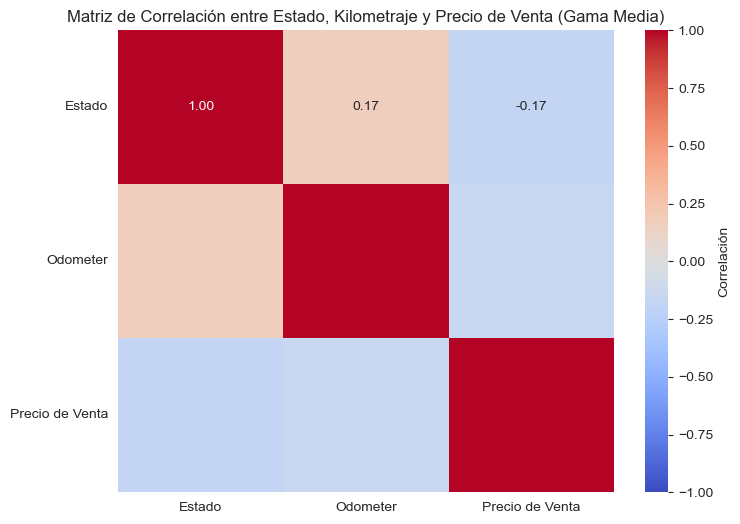

In [256]:
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, cbar_kws={'label': 'Correlación'})

heatmap.set_xticklabels(['Estado', 'Odometer', 'Precio de Venta'])
heatmap.set_yticklabels(['Estado', 'Odometer', 'Precio de Venta'], rotation=0)
plt.title('Matriz de Correlación entre Estado, Kilometraje y Precio de Venta (Gama Media)')
plt.show()

##### Interpretación del Mapa de Calor:
1) Estado vs. Precio de Venta (sellingprice):
La correlación es negativa (-0,17), esto nos dice que a medida que la condición del auto mejora, el precio tiende a disminuir ligeramente, aunque la correlación es débil.

2) Odometer (Odómetro) vs. Precio de Venta (sellingprice):
La correlación también es negativa (-0,14), lo que indica que a medida que el kilometraje aumenta, el precio disminuye, aunque nuevamente, la correlación es débil.

3) Estado vs. Odometer (Odómetro):
Hay una pequeña correlación positiva (0,17), lo que sugiere que hay una tendencia a que los autos en mejor estado tengan un kilometraje levemente superior.

## Análisis de Regresión

La correlación nos mostró una ligera relación entre las variables por lo que nos adentraremos un poco más en el análisis de esta hipótesis utilizando la librería [statsmodels], específicamente un modelo de regresión para obtener más información y definir si nuestra hipótesis se cumple o no.

In [257]:
import statsmodels.api as sm

# Variables independientes y dependientes
X = media_condition_odometer[['Estado', 'odometer']]
y = media_condition_odometer['sellingprice']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           sellingprice   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     6467.
Date:                Sat, 17 Aug 2024   Prob (F-statistic):               0.00
Time:                        18:20:07   Log-Likelihood:            -2.8971e+06
No. Observations:              281206   AIC:                         5.794e+06
Df Residuals:                  281203   BIC:                         5.794e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.005e+04     35.204    569.594      0.0

##### Interpretación del Resumen de la Regresión
Coeficientes:

Constante (const): 20050,00. Este es el valor estimado del precio de venta cuando Estado y odometer son cero.

Estado: -2441,8. Cada cambio en la categoría de Estado se asocia con una disminución de aproximadamente 2441,8 en el precio de venta. El valor p es 0,000 lo que indica que este coeficiente es estadísticamente significativo.

odometer: -0,0306. Cada incremento en el kilometraje se asocia con una disminución de 0,0306 en el precio de venta. El valor p es 0,000 lo que también indica significancia estadística.

##### Conclusión:
Finalizando nuestra exploración se entiende que el estado del auto si tiene una gran influencia sobre el precio de venta de autos "estándar", pero no así el kilometraje ya que es sumamente leve el impacto en el precio en comparación con el estado en que se encuentre el auto.

In [294]:
# Hipótesis 3 ¿Un auto de Gama Alta fabricado antes del 2010 se desvaloriza en el mercado con el paso del tiempo? ¿Infiere en esto la condición y/o el kilometraje del auto?
alta_condition = df[(df.Gama == 'Gama Alta') & (df.year <= 2010)][['year', 'make' ,'model', 'Gama', 'Estado', 'odometer', 'mmr', 'sellingprice']].reset_index(drop=True)

In [296]:
alta_condition['Estado'].value_counts()


Estado
Buen Estado         869
Excelente Estado    383
Mal Estado            0
Name: count, dtype: int64

c:\Users\Maxi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Maxi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


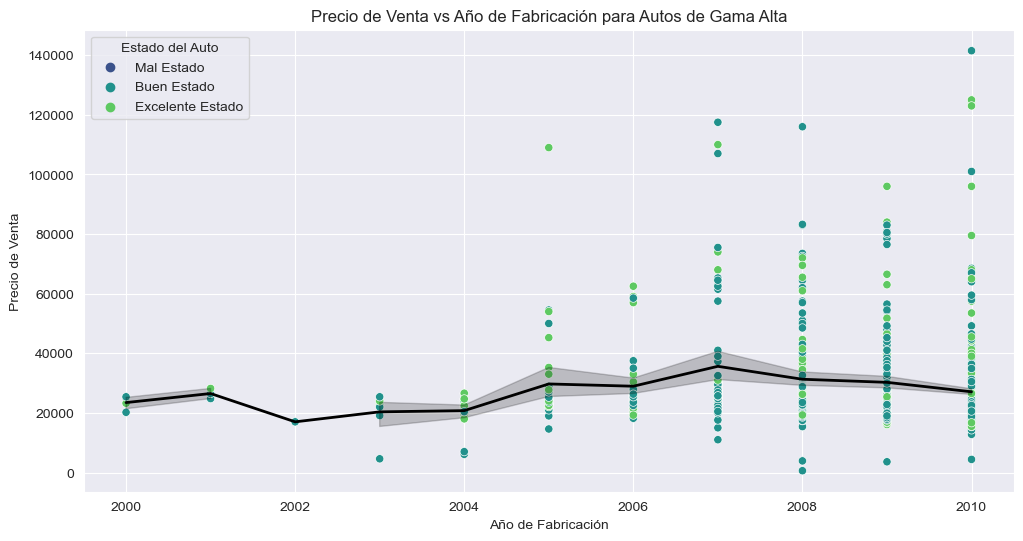

In [301]:
# Convertir 'Estado' a una variable categórica con valores numéricos si es necesario
alta_condition['Estado_num'] = alta_condition['Estado'].astype('category').cat.codes

# Gráfico de dispersión con ajuste de línea
plt.figure(figsize=(12, 6))
sns.scatterplot(x='year', y='sellingprice', hue='Estado', data=alta_condition, palette='viridis')
sns.lineplot(x='year', y='sellingprice', data=alta_condition, estimator='mean', color='black', linewidth=2)
plt.title('Precio de Venta vs Año de Fabricación para Autos de Gama Alta')
plt.xlabel('Año de Fabricación')
plt.ylabel('Precio de Venta')
plt.legend(title='Estado del Auto')
plt.show()

c:\Users\Maxi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


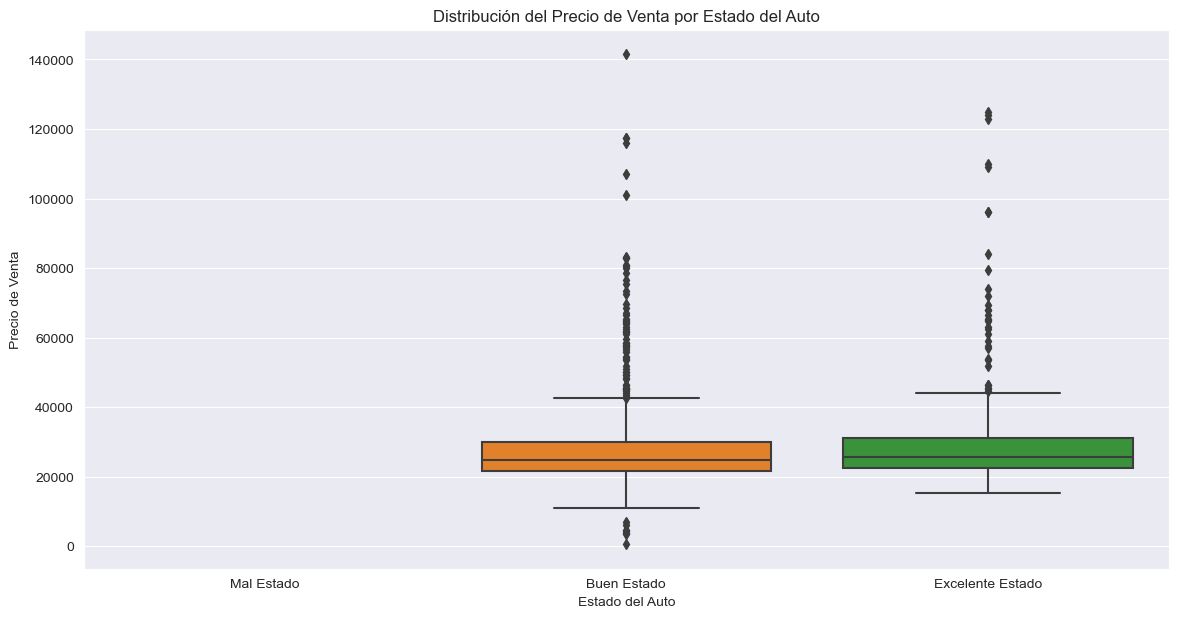

In [302]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Estado', y='sellingprice', data=alta_condition)
plt.title('Distribución del Precio de Venta por Estado del Auto')
plt.xlabel('Estado del Auto')
plt.ylabel('Precio de Venta')
plt.show()

In [303]:
import statsmodels.api as sm

# Definir variables dependientes e independientes
X = alta_condition[['year', 'Estado_num', 'odometer', 'mmr']]
y = alta_condition['sellingprice']

# Añadir una constante a las variables independientes (intercepto)
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Mostrar el resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           sellingprice   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     7291.
Date:                Sat, 17 Aug 2024   Prob (F-statistic):               0.00
Time:                        18:33:01   Log-Likelihood:                -11718.
No. Observations:                1252   AIC:                         2.345e+04
Df Residuals:                    1247   BIC:                         2.347e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.242e+05   9.56e+04      2.346      0.0